<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

(569, 30)


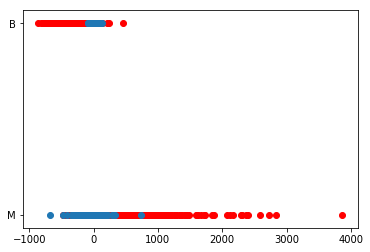

In [101]:
import matplotlib.pyplot as plt

y = df['diagnosis']
x = df.iloc[:,2:-1]
print(x.shape)

#Create PCA instance
pca = PCA(n_components = 2)
pca.fit(x)

#Eigenvectors, Eigenvalues
pca.components_ , pca.explained_variance_

#Transform data
b = pca.transform(x)

#Change to DataFrame
pca_df = pd.DataFrame(b)

#Concat
final = pd.concat([pca_df,y], axis=1).rename({0:'radius_mean',1:'texture_mean'},axis=1)

fig, ax = plt.subplots()
ax.scatter(final['radius_mean'],final['diagnosis'],color='r')
ax.scatter(final['texture_mean'],final['diagnosis'])

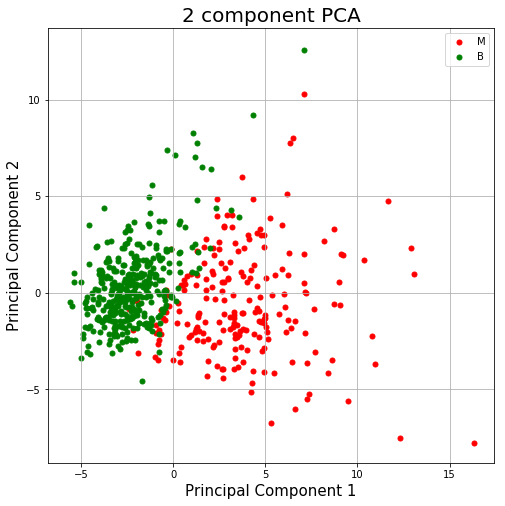

In [125]:
#From this website: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Get the values of x(independent) and y(predict)
y = df['diagnosis'].values
x = df.iloc[:,2:-1].values

#Standardrize to have a better fit
x = StandardScaler().fit_transform(x)

#Create PCA - dimension reduction to 2
pca = PCA(n_components = 2)

#Transform the data to 2 datapoints. p_comp 1 and p_comp 2
p_comp = pca.fit_transform(x)

#Put it into a dataframe
p_df = pd.DataFrame(data = p_comp
             , columns = ['principal component 1', 'principal component 2'])

#Combine p_df to the df['diagnosis'].
final_df = pd.concat([p_df, df['diagnosis']], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


diagonsis = ['M', 'B']
colors = ['r', 'g']
for diag, color in zip(diagonsis,colors):
  #Condition to location final_df diagnosis
  #When condition is M plot the point in red(color)
  #When condition is B plot the point in green(color)
  
    indicesToKeep = final_df['diagnosis'] == diag
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 25)
ax.legend(diagonsis)

#Gives grid lines for the graph
ax.grid()

In [121]:
final_df.head()

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


In [29]:
x1 = x.iloc[:,:2]
x1 = x1.rename(columns={'x':'radius_mean', 'y':'texture_mean'})

#K is the number of points to cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(x1)

#Labels given the number of K
labels = kmeans.labels_

new_series = pd.Series(labels)
x1['clusters'] = new_series.values

x1.head()

,radius_mean,texture_mean,clusters
0,17.99,10.38,1
1,20.57,17.77,2
2,19.69,21.25,2
3,11.42,20.38,0
4,20.29,14.34,2


In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].radius_mean, centroids.iloc[0].texture_mean, "ok")
  ax.plot(centroids.iloc[1].radius_mean, centroids.iloc[1].texture_mean, "ok")
  ax.plot(centroids.iloc[2].radius_mean, centroids.iloc[2].texture_mean, "ok")
#   plt.axes().set_aspect('equal')
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='radius_mean', y='texture_mean', label=key, color=colors[key])
  plt.show()
 

     radius_mean  texture_mean  clusters
3         11.420         20.38         0
7         13.710         20.83         0
8         13.000         21.82         0
9         12.460         24.04         0
10        16.020         23.24         0
13        15.850         23.95         0
14        13.730         22.61         0
15        14.540         27.54         0
16        14.680         20.13         0
26        14.580         21.53         0
28        15.300         25.27         0
36        14.250         21.72         0
38        14.990         25.20         0
39        13.480         20.82         0
40        13.440         21.58         0
41        10.950         21.35         0
43        13.280         20.28         0
44        13.170         21.81         0
49        13.490         22.30         0
50        11.760         21.60         0
54        15.100         22.02         0
57        14.710         21.59         0
61         8.598         20.98         0
62        14.250

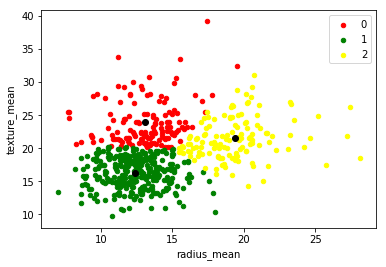

In [48]:
centroids = get_centroids(x1, 'clusters')
plot_clusters(x1, 'clusters', centroids)

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.